In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

bulk = torch.load('./result/Metabric_20240927_171933/bulk_tensor.pt', map_location=torch.device('cpu'))
bulk

,0,1,2,3,4,5,6,7,8,9,...,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052
MB-0000,0.092512,0.620738,0.669412,0.362507,0.334731,0.426603,0.595859,0.272749,0.762468,0.367971,...,0.171061,0.253953,0.543514,0.178819,0.048595,0.319394,0.265136,0.363671,0.465740,0.251623
MB-0002,0.142282,0.459544,0.672111,0.458705,0.440703,0.432918,0.618084,0.364018,0.811695,0.138022,...,0.091919,0.594472,0.507477,0.432657,0.256716,0.254516,0.504358,0.320571,0.538358,0.304265
MB-0005,0.185392,0.491229,0.371545,0.273121,0.277806,0.369608,0.085561,0.245391,0.567119,0.143136,...,0.214807,0.300604,0.698975,0.402575,0.288732,0.173187,0.354011,0.084510,0.323570,0.415891
MB-0006,0.244224,0.487829,0.674067,0.344096,0.246585,0.542456,0.209438,0.239519,0.703432,0.192469,...,0.169591,0.087736,0.462668,0.228794,0.158931,0.122546,0.180808,0.102507,0.398889,0.410380
MB-0008,0.204334,0.209808,0.640175,0.201767,0.258815,0.272313,0.303045,0.295282,0.544624,0.375715,...,0.241995,0.504817,0.564523,0.566440,0.441052,0.283469,0.315670,0.296057,0.373651,0.501790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6233,0.505288,0.559289,0.729208,0.190846,0.274435,0.464115,0.200619,0.369355,0.629305,0.464286,...,0.116248,0.326951,0.551134,0.209297,0.208273,0.354773,0.318440,0.205316,0.367399,0.273710
MB-6237,0.149488,0.424715,0.536708,0.228254,0.336877,0.257777,0.200266,0.135128,0.615759,0.342743,...,0.187264,0.528102,0.842912,0.483300,0.480452,0.337937,0.452504,0.177302,0.271895,0.615377
MB-6239,0.556164,0.581710,0.562695,0.254283,0.436538,0.452790,0.349407,0.300676,0.712682,0.417791,...,0.128849,0.189679,0.488795,0.428089,0.244975,0.434581,0.317042,0.274967,0.556448,0.306894
MB-6251,0.127380,0.726245,0.523625,0.194655,0.354918,0.366944,0.046091,0.203592,0.765332,0.442295,...,0.150351,0.454193,0.646283,0.633201,0.659798,0.223709,0.774133,0.300266,0.547767,0.764018


In [2]:
def umap_show(data):

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.T).T

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')
    plt.title('UMAP projection of gene expression data')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


In [3]:
def tsne_show(data):
    tsne = TSNE(n_components=2, random_state=42)
    embedding_tsne = tsne.fit_transform(data)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')
    plt.title('t-SNE projection of gene expression data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering(df, metric='euclidean', method='ward', color_threshold=None):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

    distance_matrix = sch.distance.pdist(df_scaled, metric=metric)

    linkage_matrix = sch.linkage(distance_matrix, method=method)

    plt.figure(figsize=(12, 7))
    dendro = sch.dendrogram(linkage_matrix, labels=df.index, orientation='top', color_threshold=color_threshold)
    plt.title('Dendrogram (Colored by Cluster)')
    plt.xlabel('Sample')
    plt.ylabel('Distance')
    plt.show()

    sample_labels = dendro['ivl']  
    leaf_colors = dendro['leaves_color_list'] 
    color_dict = {label: color for label, color in zip(sample_labels, leaf_colors)}

    original_order = df.index.tolist()
    cluster_colors_in_original_order = [color_dict[sample] for sample in original_order]

    unique_colors = list(set(cluster_colors_in_original_order))
    color_to_cluster = {color: idx + 1 for idx, color in enumerate(unique_colors)}  

    cluster_labels_in_original_order = [color_to_cluster[color] for color in cluster_colors_in_original_order]

    cluster_df = pd.DataFrame({'Sample': original_order, 'Cluster_Label': cluster_labels_in_original_order})
    print(cluster_df)

    return cluster_df


In [5]:
import torch

embedding = torch.load('./result/Metabric_20240927_171933/embedding.pt', map_location=torch.device('cpu'))
embedding

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
MB-0000,-1.658996,-2.514051,-0.653830,2.343965,1.248664,0.267111,1.096358,-0.027002,0.787040,-0.883911,...,-4.251194,-0.153524,0.267210,0.668044,0.583426,0.230834,4.970461,2.835729,2.725396,6.519811
MB-0002,-2.853175,-3.902676,-4.519706,-0.016224,-3.315895,-1.706536,3.852041,0.923468,1.044985,-1.842136,...,-1.339645,-2.552524,-0.556654,-2.212280,2.253963,5.299031,-1.231384,-0.886365,-3.803849,-1.936329
MB-0005,-0.893942,-0.788586,-0.056613,0.721576,-2.040926,-2.534393,-0.187086,0.524925,2.096581,-2.391336,...,0.297091,1.378942,2.599144,1.016889,0.699514,3.927659,-0.631314,-2.702767,0.140935,-0.942801
MB-0006,-2.187209,-0.350780,-1.321259,-0.626937,-1.514434,0.084918,-0.960733,0.257485,1.529218,0.602227,...,-0.250308,0.482137,-0.594156,-0.202010,0.292783,1.052302,-1.034818,0.617506,-1.038032,-0.077446
MB-0008,-2.634877,0.395190,-0.669972,-1.106485,-0.597282,2.465796,0.508954,0.885680,-0.170442,0.034052,...,-0.610414,1.993076,-0.496664,0.134763,-0.588554,-2.026127,-0.375207,5.042097,-1.711429,0.667313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6233,-2.745940,-2.231532,-1.598464,-2.942642,-0.468234,0.202942,2.545067,4.236549,-0.768148,-1.107489,...,-0.411870,0.373343,-1.926920,-1.567752,0.979297,0.721305,-1.181430,3.280013,-5.784093,0.239964
MB-6237,-2.528061,0.292677,-0.630593,-0.987512,-0.574160,2.276243,0.544071,0.844616,-0.112740,0.068039,...,-0.703975,1.891373,-0.422201,0.164148,-0.504026,-1.921955,-0.257601,4.882999,-1.562286,0.763975
MB-6239,0.569756,-2.633785,-1.230065,-1.543936,-0.550287,1.879800,-1.276267,1.470146,1.529161,-0.604508,...,2.403732,2.571522,-1.827875,-1.866828,0.517186,-1.692824,-0.325369,0.849900,-4.364399,2.598447
MB-6251,-2.107693,-0.419608,0.719259,2.088298,-0.265675,0.294111,2.351866,-0.351012,2.241739,1.393762,...,-4.432705,-1.517268,-1.321426,0.664644,0.394051,1.013112,2.517469,4.844419,2.225292,3.606326


In [6]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
MB-0000,-1.658996,-2.514051,-0.653830,2.343965,1.248664,0.267111,1.096358,-0.027002,0.787040,-0.883911,...,-4.251194,-0.153524,0.267210,0.668044,0.583426,0.230834,4.970461,2.835729,2.725396,6.519811
MB-0002,-2.853175,-3.902676,-4.519706,-0.016224,-3.315895,-1.706536,3.852041,0.923468,1.044985,-1.842136,...,-1.339645,-2.552524,-0.556654,-2.212280,2.253963,5.299031,-1.231384,-0.886365,-3.803849,-1.936329
MB-0005,-0.893942,-0.788586,-0.056613,0.721576,-2.040926,-2.534393,-0.187086,0.524925,2.096581,-2.391336,...,0.297091,1.378942,2.599144,1.016889,0.699514,3.927659,-0.631314,-2.702767,0.140935,-0.942801
MB-0006,-2.187209,-0.350780,-1.321259,-0.626937,-1.514434,0.084918,-0.960733,0.257485,1.529218,0.602227,...,-0.250308,0.482137,-0.594156,-0.202010,0.292783,1.052302,-1.034818,0.617506,-1.038032,-0.077446
MB-0008,-2.634877,0.395190,-0.669972,-1.106485,-0.597282,2.465796,0.508954,0.885680,-0.170442,0.034052,...,-0.610414,1.993076,-0.496664,0.134763,-0.588554,-2.026127,-0.375207,5.042097,-1.711429,0.667313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-6233,-2.745940,-2.231532,-1.598464,-2.942642,-0.468234,0.202942,2.545067,4.236549,-0.768148,-1.107489,...,-0.411870,0.373343,-1.926920,-1.567752,0.979297,0.721305,-1.181430,3.280013,-5.784093,0.239964
MB-6237,-2.528061,0.292677,-0.630593,-0.987512,-0.574160,2.276243,0.544071,0.844616,-0.112740,0.068039,...,-0.703975,1.891373,-0.422201,0.164148,-0.504026,-1.921955,-0.257601,4.882999,-1.562286,0.763975
MB-6239,0.569756,-2.633785,-1.230065,-1.543936,-0.550287,1.879800,-1.276267,1.470146,1.529161,-0.604508,...,2.403732,2.571522,-1.827875,-1.866828,0.517186,-1.692824,-0.325369,0.849900,-4.364399,2.598447
MB-6251,-2.107693,-0.419608,0.719259,2.088298,-0.265675,0.294111,2.351866,-0.351012,2.241739,1.393762,...,-4.432705,-1.517268,-1.321426,0.664644,0.394051,1.013112,2.517469,4.844419,2.225292,3.606326


c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27808\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


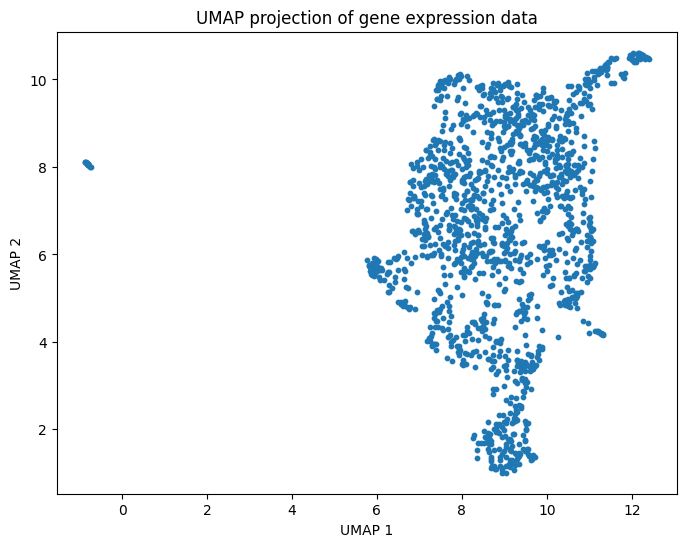

c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27808\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


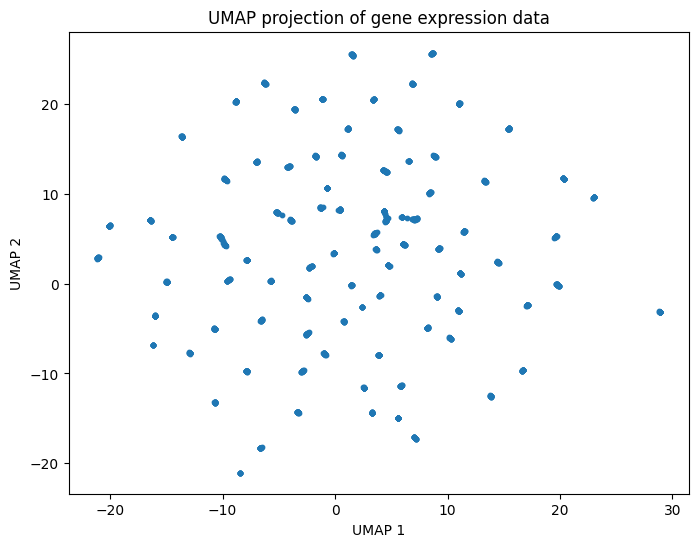

(None, None)

In [7]:
# original data exp and embedding after barlow_twins
umap_show(bulk), umap_show(embedding)

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27808\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


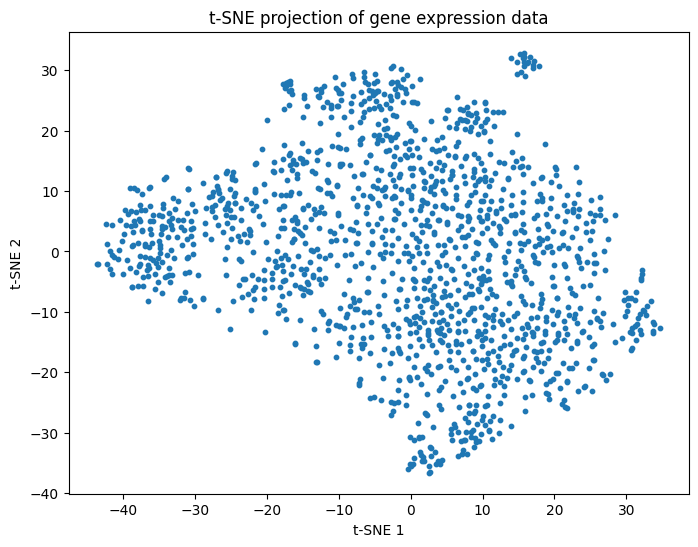

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27808\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


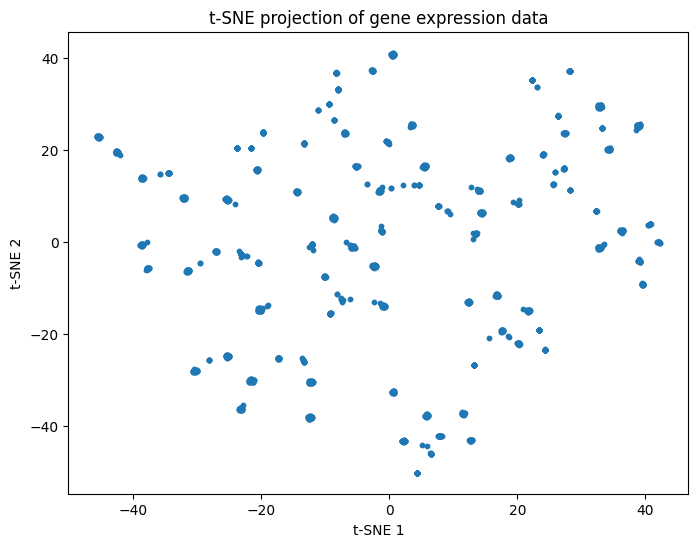

(None, None)

In [8]:
# original data exp and embedding after barlow_twins
tsne_show(bulk), tsne_show(embedding)

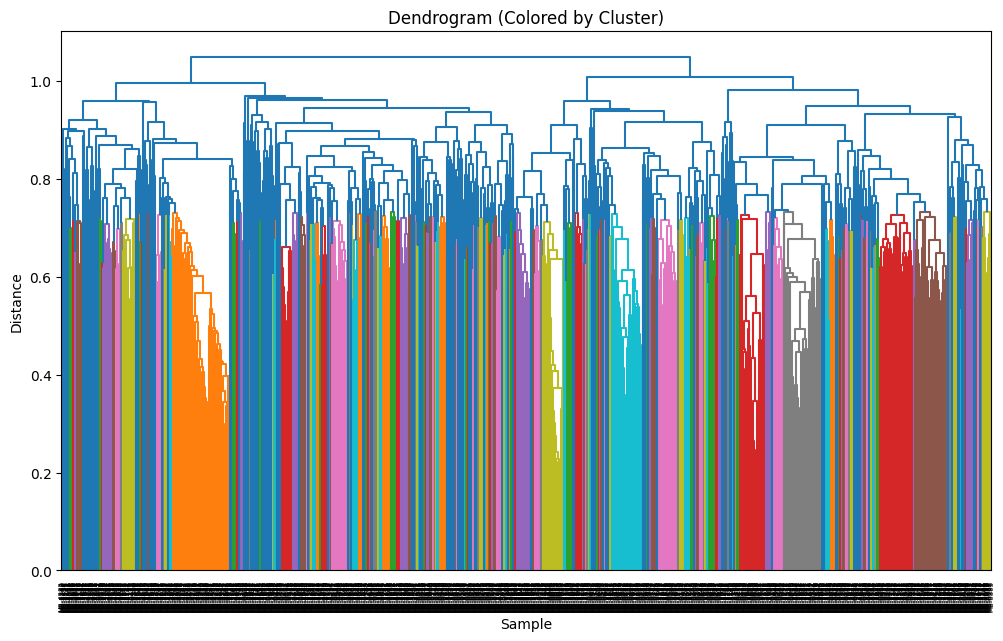

       Sample  Cluster_Label
0     MB-0000              4
1     MB-0002              8
2     MB-0005              1
3     MB-0006              1
4     MB-0008              3
...       ...            ...
1461  MB-6233              4
1462  MB-6237              6
1463  MB-6239              7
1464  MB-6251              6
1465  MB-6346             10

[1466 rows x 2 columns]


,Sample,Cluster_Label
0,MB-0000,4
1,MB-0002,8
2,MB-0005,1
3,MB-0006,1
4,MB-0008,3
...,...,...
1461,MB-6233,4
1462,MB-6237,6
1463,MB-6239,7
1464,MB-6251,6


In [9]:
# original
hierarchical_clustering(bulk, metric = 'correlation', method = 'average')

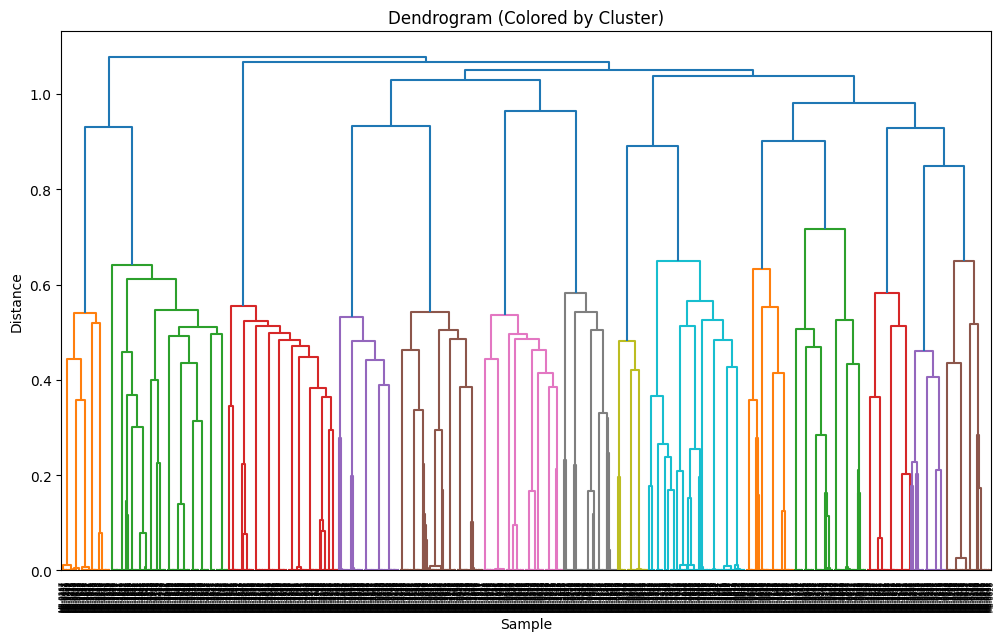

       Sample  Cluster_Label
0     MB-0000              3
1     MB-0002              4
2     MB-0005              4
3     MB-0006              4
4     MB-0008              8
...       ...            ...
1461  MB-6233              2
1462  MB-6237              8
1463  MB-6239              9
1464  MB-6251              3
1465  MB-6346              2

[1466 rows x 2 columns]


,Sample,Cluster_Label
0,MB-0000,3
1,MB-0002,4
2,MB-0005,4
3,MB-0006,4
4,MB-0008,8
...,...,...
1461,MB-6233,2
1462,MB-6237,8
1463,MB-6239,9
1464,MB-6251,3


In [10]:
# after barlow twins
hierarchical_clustering(embedding, metric = 'correlation', method = 'average')

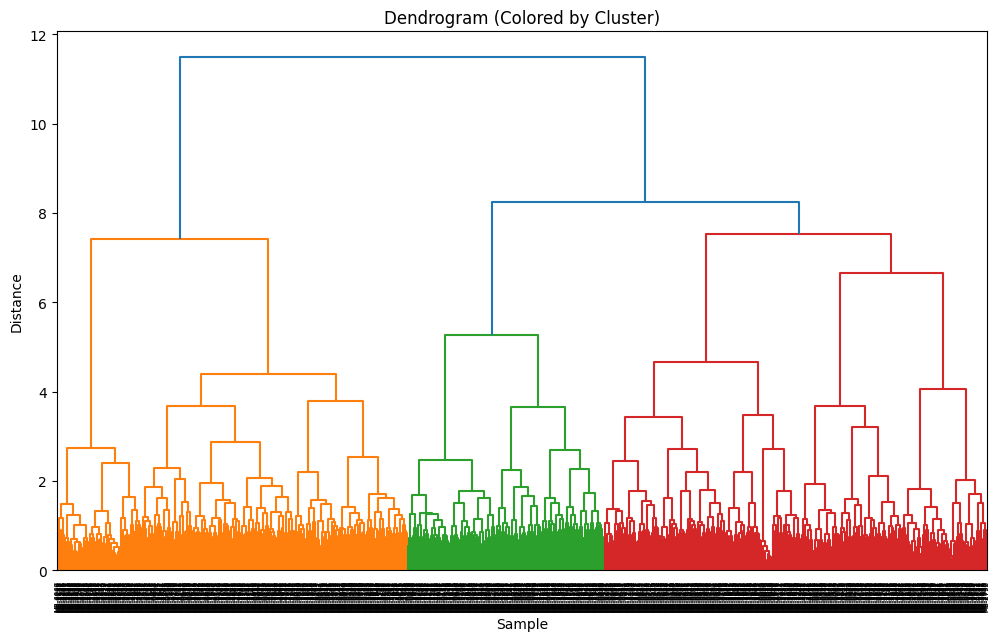

       Sample  Cluster_Label
0     MB-0000              2
1     MB-0002              3
2     MB-0005              2
3     MB-0006              2
4     MB-0008              3
...       ...            ...
1461  MB-6233              2
1462  MB-6237              1
1463  MB-6239              3
1464  MB-6251              1
1465  MB-6346              3

[1466 rows x 2 columns]


In [11]:
# original
cluster_label = hierarchical_clustering(bulk, metric = 'correlation', method = 'ward')

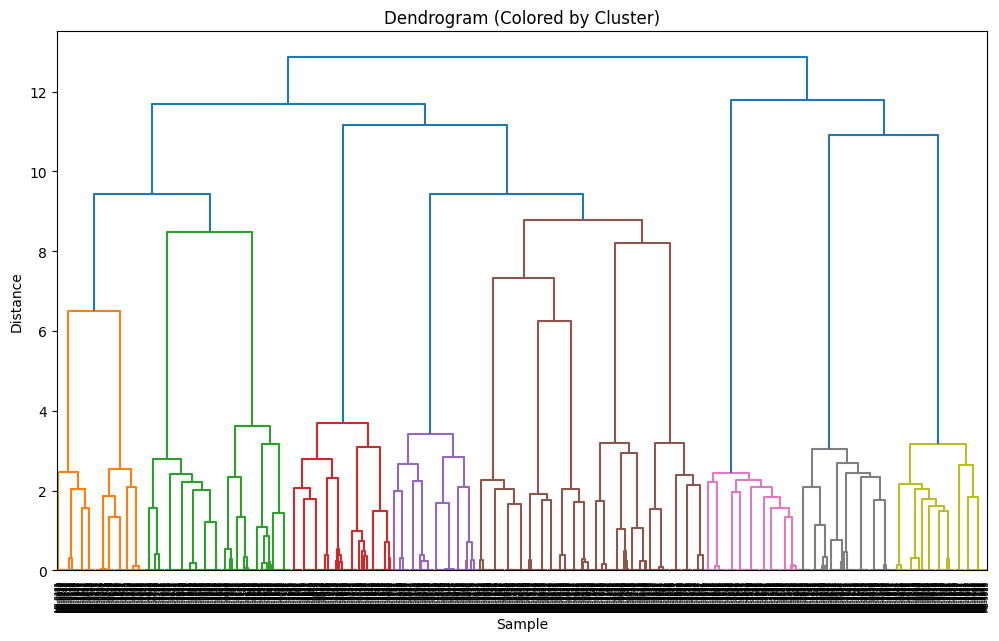

       Sample  Cluster_Label
0     MB-0000              7
1     MB-0002              4
2     MB-0005              4
3     MB-0006              4
4     MB-0008              3
...       ...            ...
1461  MB-6233              3
1462  MB-6237              3
1463  MB-6239              3
1464  MB-6251              5
1465  MB-6346              2

[1466 rows x 2 columns]


,Sample,Cluster_Label
0,MB-0000,7
1,MB-0002,4
2,MB-0005,4
3,MB-0006,4
4,MB-0008,3
...,...,...
1461,MB-6233,3
1462,MB-6237,3
1463,MB-6239,3
1464,MB-6251,5


In [12]:
# after barlow twins
hierarchical_clustering(embedding, metric = 'correlation', method = 'ward')

In [13]:
cluster_label['Cluster_Label'].value_counts()

2    603
3    553
1    310
Name: Cluster_Label, dtype: int64

In [15]:
pam50_path = '../brca_metabric/Synapse_metabric/Complete_METABRIC_Clinical_Features_Data.txt'
pam50 = pd.read_csv(pam50_path, index_col=0, sep=',', on_bad_lines='skip')

In [16]:
pam50.columns

Index(['age_at_diagnosis', 'size', 'lymph_nodes_positive', 'grade',
       'histological_type', 'ER_IHC_status', 'ER.Expr', 'PR.Expr',
       'HER2_IHC_status', 'HER2_SNP6_state', 'Her2.Expr', 'Treatment',
       'NOT_IN_OSLOVAL_menopausal_status_inferred', 'NOT_IN_OSLOVAL_group',
       'NOT_IN_OSLOVAL_stage', 'NOT_IN_OSLOVAL_lymph_nodes_removed',
       'NOT_IN_OSLOVAL_NPI', 'NOT_IN_OSLOVAL_cellularity',
       'NOT_IN_OSLOVAL_P53_mutation_status',
       'NOT_IN_OSLOVAL_P53_mutation_type',
       'NOT_IN_OSLOVAL_P53_mutation_details', 'NOT_IN_OSLOVAL_Pam50Subtype',
       'NOT_IN_OSLOVAL_IntClustMemb', 'NOT_IN_OSLOVAL_Site',
       'NOT_IN_OSLOVAL_Genefu'],
      dtype='object')

In [17]:
pam50 = pam50[['NOT_IN_OSLOVAL_Pam50Subtype']]

In [18]:
cluster_label.set_index('Sample', inplace=True)

In [19]:
common_index = cluster_label.index.intersection(pam50.index)
cluster_label = cluster_label.loc[common_index]
pam50 = pam50.loc[common_index]

In [20]:
pam50

,NOT_IN_OSLOVAL_Pam50Subtype
MB-0000,Normal
MB-0005,LumB
MB-0006,LumB
MB-0008,LumB
MB-0010,LumB
...,...
MB-6233,LumB
MB-6237,Basal
MB-6239,Normal
MB-6251,Basal


In [21]:
cluster_label

,Cluster_Label
MB-0000,2
MB-0005,2
MB-0006,2
MB-0008,3
MB-0010,1
...,...
MB-6233,2
MB-6237,1
MB-6239,3
MB-6251,1


In [22]:
df = cluster_label.merge(pam50, left_index=True, right_index=True, how='inner')
df.to_csv('./result/pam50_analysis.csv')